In [2]:
import numpy as np
import pandas as pd
from varclushi import VarClusHi

Create a VarClusHi object and pass the dataframe (df) to be analyzed as a parameter, you can also specify

a feature list (feat_list, default all columns of df)
max second eigenvalue (maxeigval2, default 1)
max clusters (maxclus, default None)
Then call method varclus(), which performs hierachical variable clustering algorithm

In [3]:
df = pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/diabetes.csv')

In [4]:
X=df.drop(['Outcome'],axis=1)
Y=df[['Outcome']]

In [8]:
X.shape

(768, 8)

In [5]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_std=pd.DataFrame(std.fit_transform(X),index=X.index,columns=X.columns)

In [6]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

 Eigen Values 
%s [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [32]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.17974932  47.81987607  60.69024944  71.63436249  81.16366731
  89.69652215  94.9442244  100.        ]


In [35]:
demo1_vc = VarClusHi(X_std,maxeigval2=0.42036353,maxclus=3)
demo1_vc.varclus()

In [ ]:
Call info, you can get the number of clusters, number of variables in each cluster (N_vars), 
variance explained by each cluster (Eigval1), etc.

In [36]:
demo1_vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,3,1.447801,0.887974,0.482600
1,1,2,1.544341,0.455659,0.772171
2,2,3,1.594711,0.808802,0.531570


In [ ]:
Call rsquare, you can get the (1 - rsquare) ratio of each variable

In [25]:
demo1_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Glucose,0.548782,0.049998,0.474966
1,0,Insulin,0.599575,0.114668,0.452288
2,0,DiabetesPedigreeFunction,0.299445,0.029821,0.722089
3,1,Pregnancies,0.772171,0.000729,0.227996
4,1,Age,0.772171,0.015617,0.231444
5,2,SkinThickness,0.557513,0.110525,0.497470
6,2,BMI,0.631529,0.074036,0.397932
7,2,BloodPressure,0.405669,0.046951,0.623610


In [28]:
selected_list=['Insulin','Pregnancies','BMI']
X_reduced=X[selected_list]

In [26]:
import seaborn as sns
corr=X.corr()

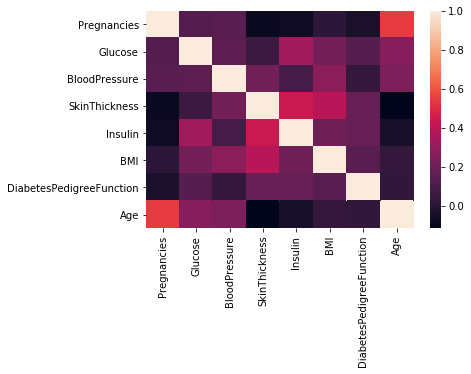

In [27]:
ax=sns.heatmap(corr)

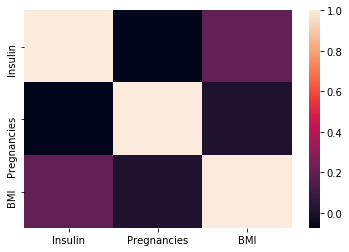

In [29]:
corr2=X_reduced.corr()
ax=sns.heatmap(corr2)

In [30]:
X_reduced.shape

(768, 3)

In [31]:
X.shape

(768, 8)